In [1]:
import pandas as pd

# Load data
df = pd.read_csv("data\Mall_Customers.csv")

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


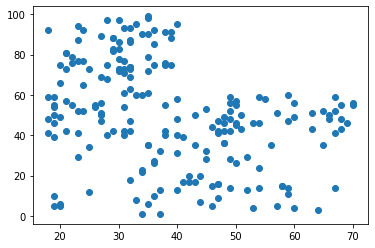

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Age'], y = df['Spending Score (1-100)'])

In [4]:
from sklearn.preprocessing import StandardScaler
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


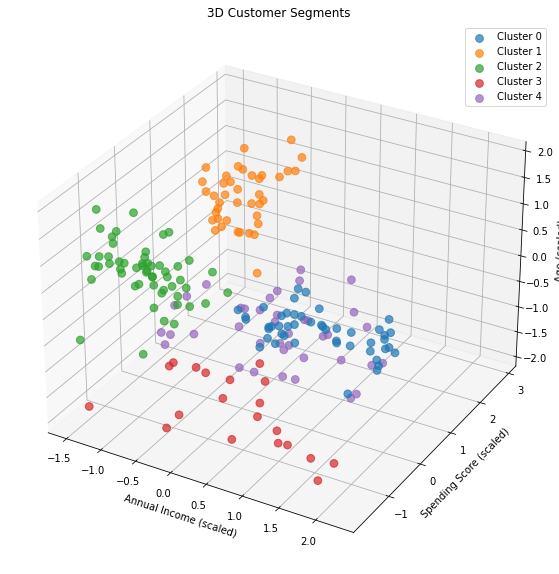

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster in sorted(df['Cluster'].unique()):
    ix = df['Cluster'] == cluster
    ax.scatter(
        X_scaled[ix, 0], X_scaled[ix, 1], X_scaled[ix, 2], 
        label=f"Cluster {cluster}", s=60, alpha=0.7
    )

ax.set_xlabel("Annual Income (scaled)")
ax.set_ylabel("Spending Score (scaled)")
ax.set_zlabel("Age (scaled)")
ax.set_title("3D Customer Segments")
ax.legend()
plt.show()

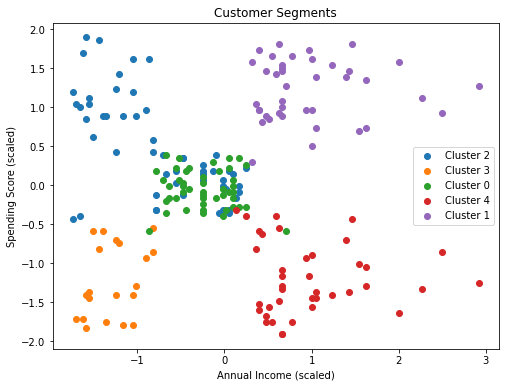

In [7]:
plt.figure(figsize=(8,6))
for cluster in df['Cluster'].unique():
    plt.scatter(X_scaled[df['Cluster'] == cluster][:, 1],
                X_scaled[df['Cluster'] == cluster][:, 2], 
                label=f'Cluster {cluster}')
plt.title("Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

In [8]:
# Measures how tightly the data points are grouped within clusters (lower is better)
print ("Inertia: " , kmeans.inertia_)

Inertia:  168.2475801755683


In [9]:
# Range: -1 to 1 (closer to 1 is better)
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.41664341513732767


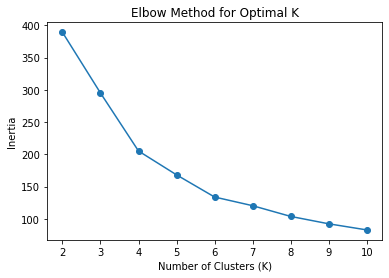

In [10]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()